In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
color = sns.color_palette()  #  기본 색상 팔레트 가져오기

%matplotlib inline  # 매직 커맨드, 노트북 셀 안에 그래프 출력되도록 해줌

# pd.options.mode.chained_assignment = None  # 판다스 경고 끄는 코드
# pd.options.display.max_columns = 999  # 데이터 프레임 999개까지 출력

UsageError: unrecognized arguments: # 매직 커맨드, 노트북 셀 안에 그래프 출력되도록 해줌


In [70]:
train_df = pd.read_csv("C:/Users/cloud/Desktop/2025/ALCP/캐글 필사/data/train_2016_v2.csv", 
                       parse_dates=["transactiondate"])

# transactiondate 열을 읽을 때 날짜 타입으로 자동 변환

train_df.shape

(90275, 3)

In [71]:
train_df.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


# logerror
Target variable for competition is "logerror"\
Do some Analysis about log error first

Text(0, 0.5, 'logerror')

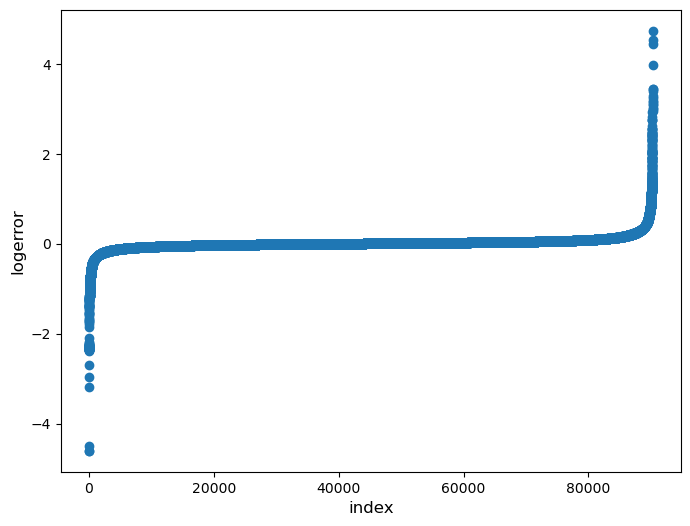

In [72]:
plt.figure(figsize = (8, 6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror.values))
plt.xlabel('index', fontsize = 12)
plt.ylabel('logerror', fontsize = 12)

some outliers exist at both end\
remove outliers and do a histogram plot

C:\Users\cloud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'logerror')

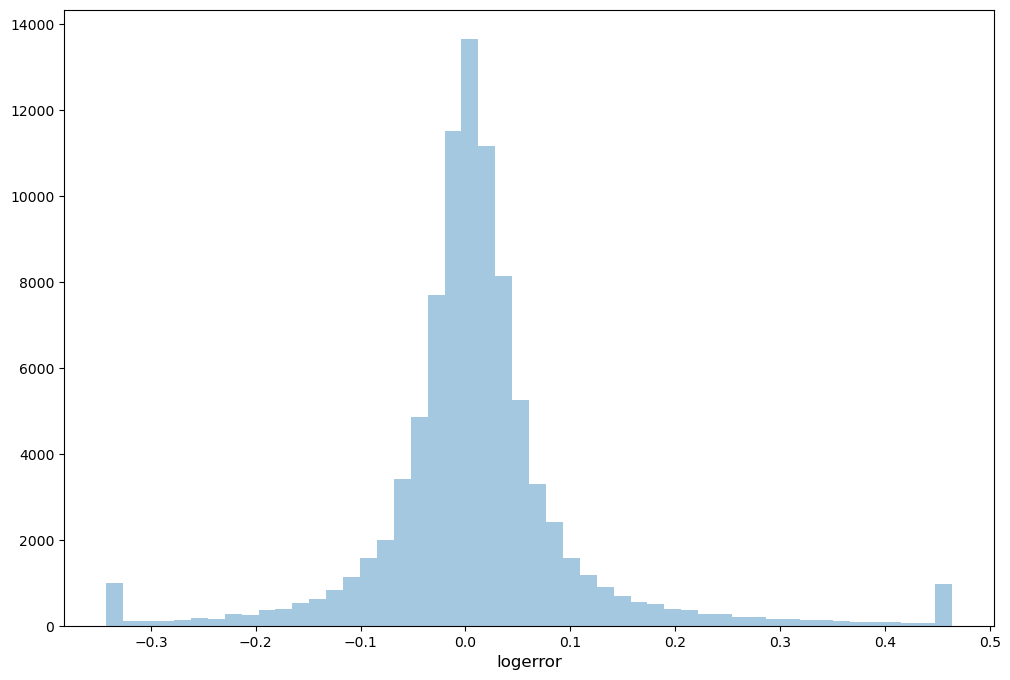

In [73]:
# 백분위수 99이상, 1이하 이상치 99, 1 분위수로 대체
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)

train_df_logerror = train_df["logerror"]

train_df.loc[train_df_logerror > ulimit, 'logerror'] = ulimit
train_df.loc[train_df_logerror < llimit, 'logerror'] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=50, kde=False)
# kde -> 선형 모양 출력

plt.xlabel('logerror', fontsize=12)

Nice normal distribution about log error

# Transaction Date

now explore about date field\
first check the number of transactions in each month

In [74]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

# .dt -> 판다스에서 datetime 속성을 뽑을 때 쓰는 도구
# .dt.month  .dt.year  .dt.day  .dt.weekday 등등 있음

C:\Users\cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


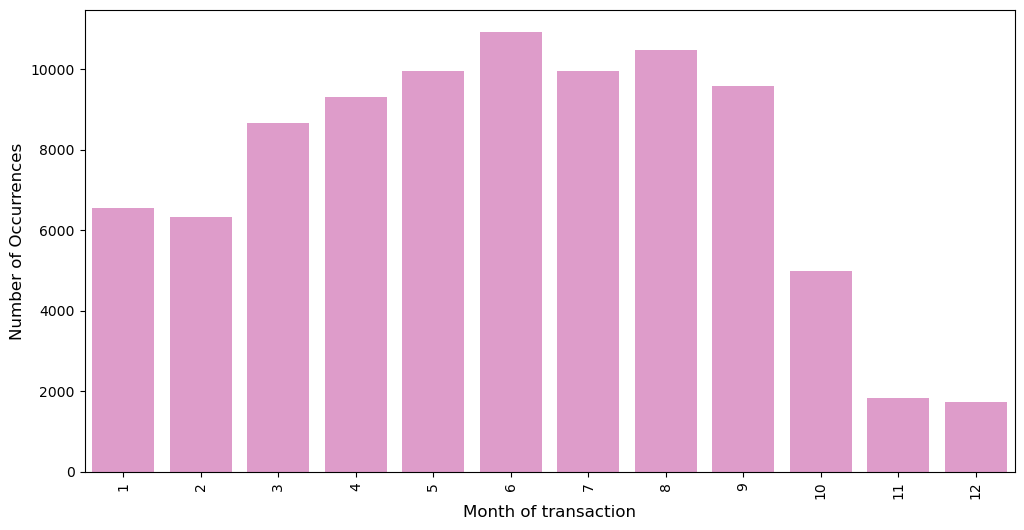

In [75]:
cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize = (12, 6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha = 0.8, color = color[6])
plt.xticks(rotation="vertical")
plt.xlabel("Month of transaction", fontsize = 12)
plt.ylabel("Number of Occurrences", fontsize = 12)
plt.show()

We have shorter bars in the last three months

In [76]:
# parcel ID
(train_df["parcelid"].value_counts().reset_index())['parcelid'].value_counts()

# most parcel IDs are apperaing only one time

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [77]:
# properties 2016
prop_df = pd.read_csv("C:/Users/cloud/Desktop/2025/ALCP/캐글 필사/data/properties_2016.csv")
prop_df

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\1748581587.py:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop_df = pd.read_csv("C:/Users/cloud/Desktop/2025/ALCP/캐글 필사/data/properties_2016.csv")


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
prop_df.shape

(2985217, 58)

In [79]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


There are so many NaN values.\
So we have to explore about that one.

In [80]:
missing_df = prop_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ["columns_name", "missing_count"]

In [81]:
missing_df = missing_df.loc[missing_df["missing_count"]>0]
missing_df = missing_df.sort_values(by="missing_count")
missing_df

,columns_name,missing_count
35,rawcensustractandblock,11437
25,longitude,11437
24,latitude,11437
37,regionidcounty,11437
17,fips,11437
33,propertylandusetypeid,11437
52,assessmentyear,11439
5,bedroomcnt,11450
4,bathroomcnt,11462
40,roomcnt,11475


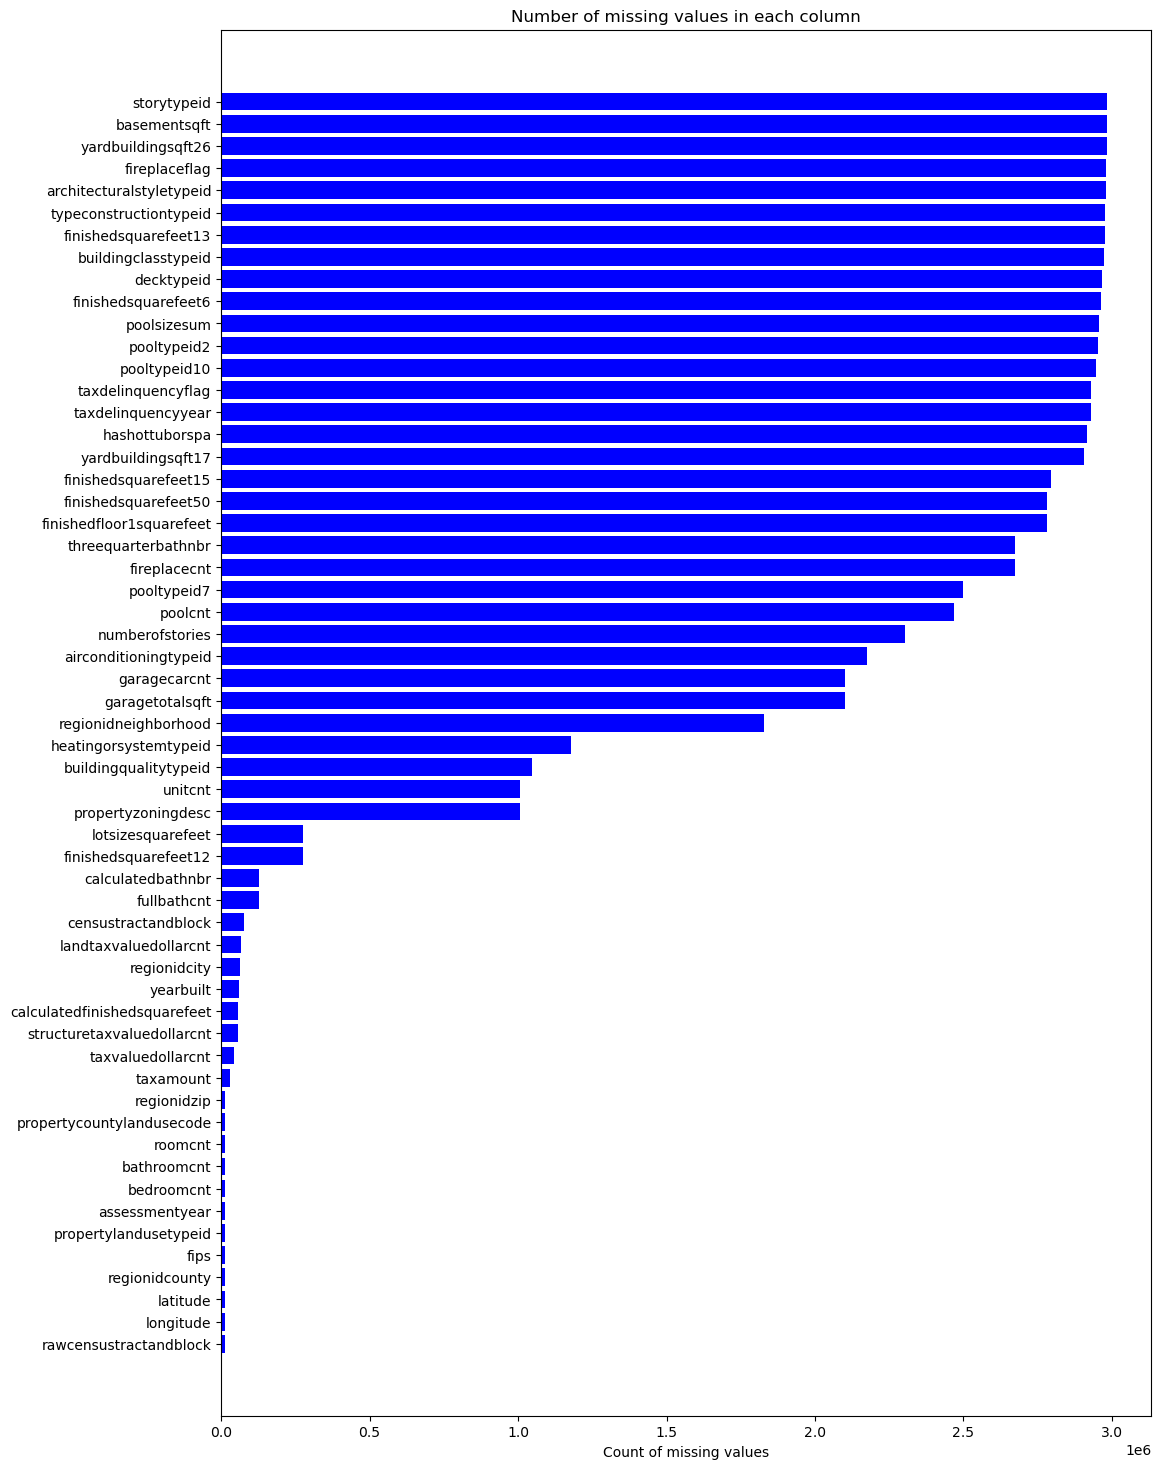

In [82]:
ind = np.arange(missing_df.shape[0])
width = 0.9

# fig - 도화지, ax - 펜
fig, ax = plt.subplots(figsize=(12, 18))

# 수평 막대 그래프
rects = ax.barh(ind, missing_df.missing_count.values, color="blue") 

ax.set_yticks(ind)
ax.set_yticklabels(missing_df.columns_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

C:\Users\cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cloud\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x1200 with 0 Axes>

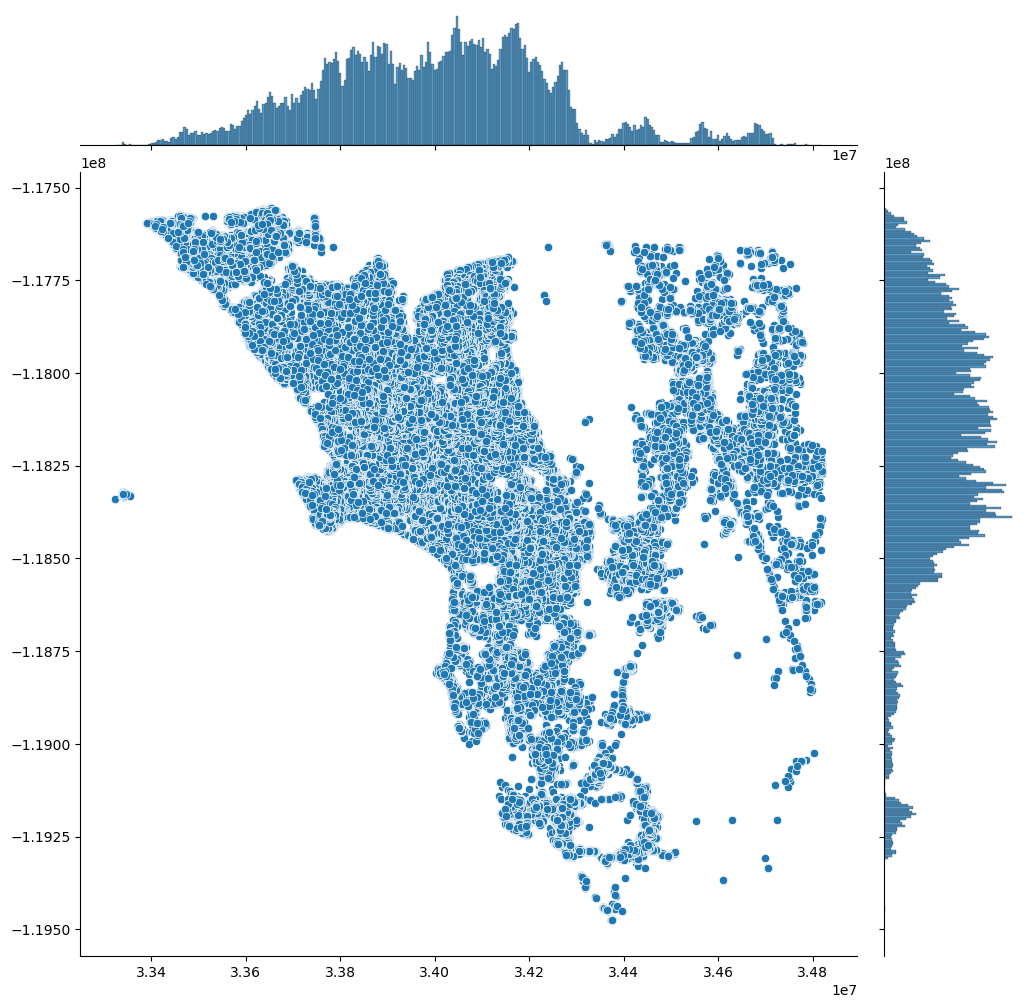

In [83]:
# explore about longitude and latitude variable

plt.figure(figsize=(12,12))
sns.jointplot(prop_df.latitude.values, prop_df.longitude.values, size=10)
plt.ylabel("Longitude", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.show()

we have about 90,811 rows in train but 2,985,217 row in properties file.\
So let us merge the two files

In [84]:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

# how -> inner(교집합), left(왼쪽 df), right, outer(합집합)

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [85]:
# check about dtypes of variables
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


Almost all are float variables\
Lets get count

In [86]:
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


now check the number of Nulls in this new merged dataset

In [87]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ["column_name", "missing_count"]
missing_df["missing_ratio"] = missing_df["missing_count"] / train_df.shape[0]
missing_df.loc[missing_df["missing_ratio"]>0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


Univariate Analysis

there are so many variables, \
so we first take 'float' ones alone and then get correlation with target variable

In [88]:
# just impute the missing values with mean values to compute 
# correlation coefficients

mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values)

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\4212925587.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_values = train_df.mean(axis=0)
C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\4212925587.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = train_df.mean(axis=0)


In [89]:
train_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      90275 non-null  int64         
 1   logerror                      90275 non-null  float64       
 2   transactiondate               90275 non-null  datetime64[ns]
 3   transaction_month             90275 non-null  int64         
 4   airconditioningtypeid         90275 non-null  float64       
 5   architecturalstyletypeid      90275 non-null  float64       
 6   basementsqft                  90275 non-null  float64       
 7   bathroomcnt                   90275 non-null  float64       
 8   bedroomcnt                    90275 non-null  float64       
 9   buildingclasstypeid           90275 non-null  float64       
 10  buildingqualitytypeid         90275 non-null  float64       
 11  calculatedbathnbr           

In [90]:
x_cols = [col for col in train_df_new.columns 
          if col not in ["logerror"] if train_df_new[col].dtype == 'float64']

# logerror 컴럼은 제외 & float64 dtype인 column만 포함
x_cols

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollar

In [91]:
# col과 logerror 사이의 상관관계 구하기

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values,
                             train_df_new.logerror.values)[0, 1])
corr_df = pd.DataFrame({'col_labels' : labels, "corr_values" : values})
corr_df = corr_df.sort_values(by="corr_values")
corr_df

C:\Users\cloud\anaconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\cloud\anaconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
33,regionidcounty,-0.009844
6,buildingqualitytypeid,-0.006648
41,yardbuildingsqft17,-0.006643
40,unitcnt,-0.005685
48,landtaxvaluedollarcnt,-0.004153
34,regionidneighborhood,-0.003379
30,propertylandusetypeid,-0.002520
35,regionidzip,-0.002490


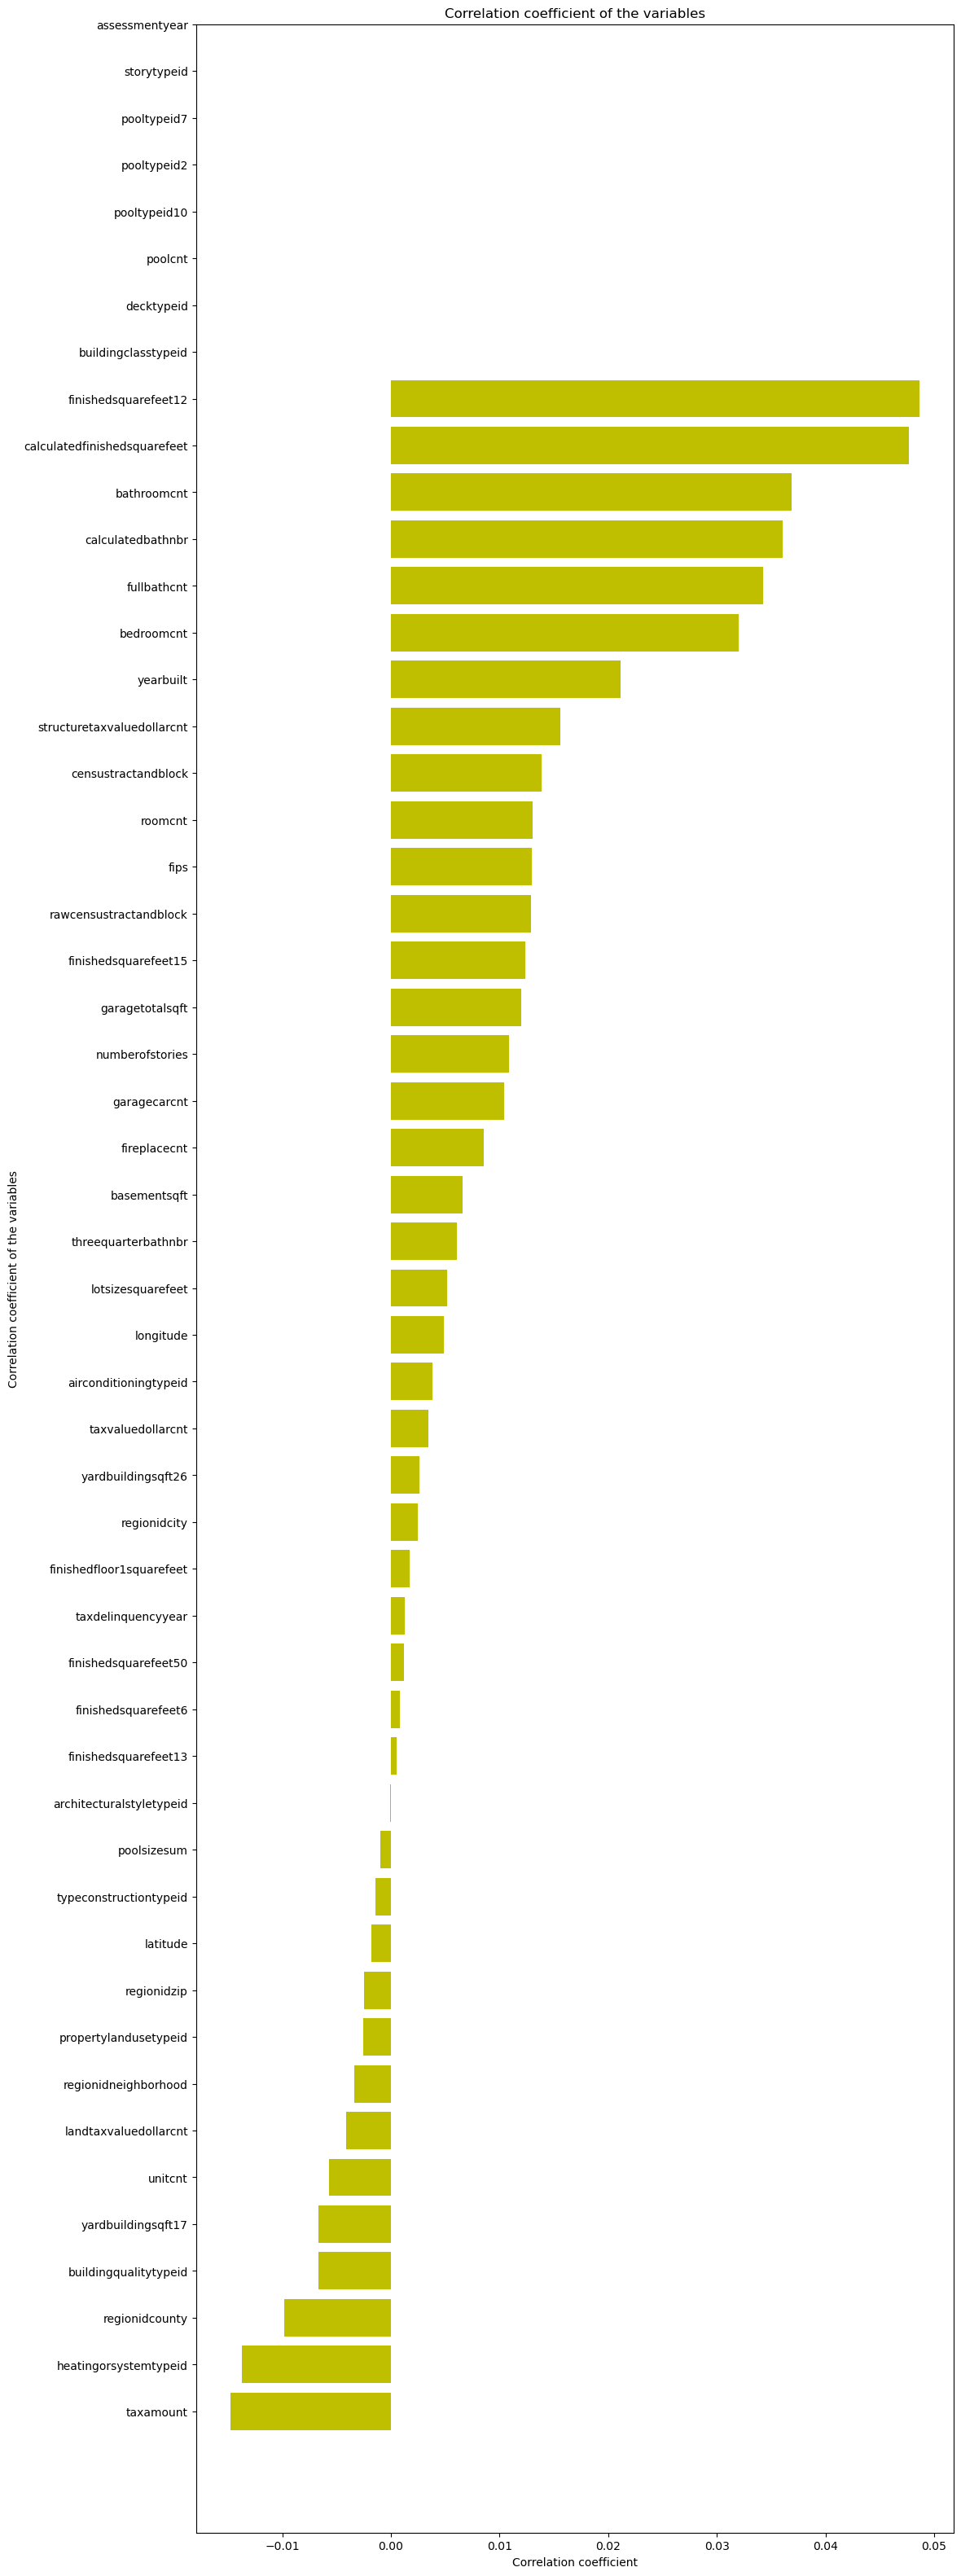

In [92]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize = (12, 40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')

ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_ylabel("Correlation coefficient of the variables")
ax.set_title("Correlation coefficient of the variables")

plt.show()

# 값이 전부 같은 경우 상관관계는 nan

Correlation of the target variable with the given set of variables are low overall

There are few variables above that have no correlation values.\
I guess they have only one unique value.

In [93]:
corr_zero_cols = ["assessmentyear", "storytypeid", "pooltypeid2", "pooltypeid7",
                 "pooltypeid10", "poolcnt", "decktypeid", "buildingclasstypeid"]

for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


High correlation value를 take해서 analysis하자는데 0.02보다 큰 것들..\
너무 작은거 아닌가?

-> 실제 데이터에서 상관관계가 강하게 나타나는 경우는 거의 없음\
특히 부동산 데이터처럼 복잡한 데이터인 경우

-> logerror는 노이즈가 많은 예측값\
당연히 독립변수들과 뚜렷한 상관관계가 드물다


In [94]:
corr_df_sel = corr_df.loc[(corr_df["corr_values"] > 0.02) | 
                           (corr_df["corr_values"] < -0.01)]
corr_df_sel

,col_labels,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


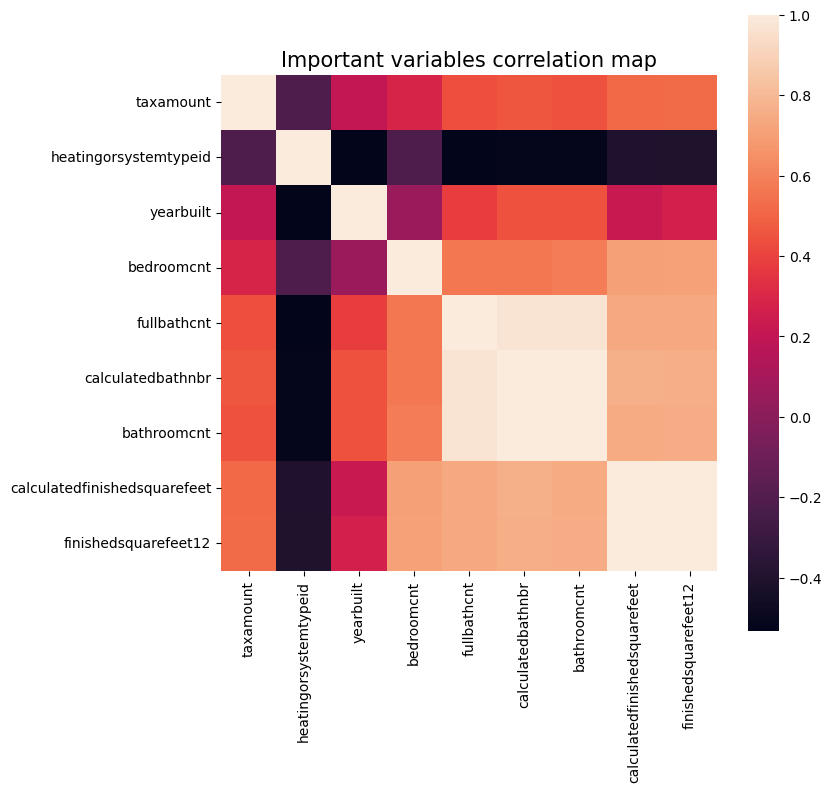

In [95]:
# 피처들간의 상관계수 구하기 -> 다중공선성

cols_to_use = corr_df_sel.col_labels.tolist()

temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method="spearman")
f, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corrmat, vmax=1, square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Lets see how the finished square feet 12 varies with the log error

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\1089435723.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] > ulimit] = ulimit
C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\1089435723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] < llimit] = llimit
C:\Users\cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinter

<Figure size 1200x1200 with 0 Axes>

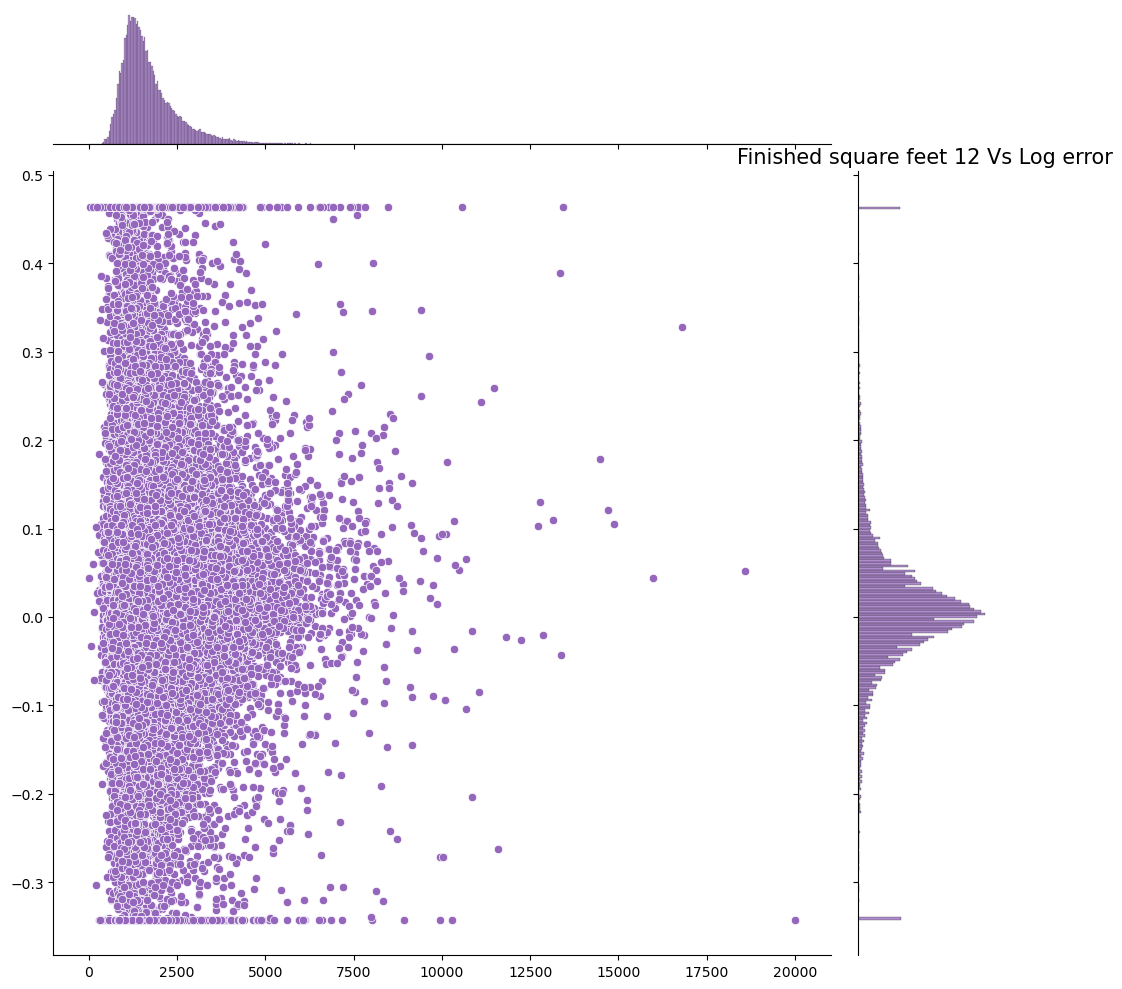

In [96]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)

train_df[col].loc[train_df[col] > ulimit] = ulimit
train_df[col].loc[train_df[col] < llimit] = llimit

plt.figure(figsize=(12, 12))
sns.jointplot(train_df.finishedsquarefeet12.values, 
              train_df.logerror.values, size = 10, color=color[4])
plt.ylabel("Log Error", fontsize=12)
plt.xlabel("Finished Square Feet 12", fontsize = 12)
plt.title("Finished square feet 12 Vs Log error", fontsize = 15)
plt.show()

range of logerror narrows down with increase in finished square feet 12 variable.\
Probably larger houses are easy to predict?

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\2498468140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] > ulimit] = ulimit
C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\2498468140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] < llimit] = llimit
C:\Users\cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinter

<Figure size 1200x1200 with 0 Axes>

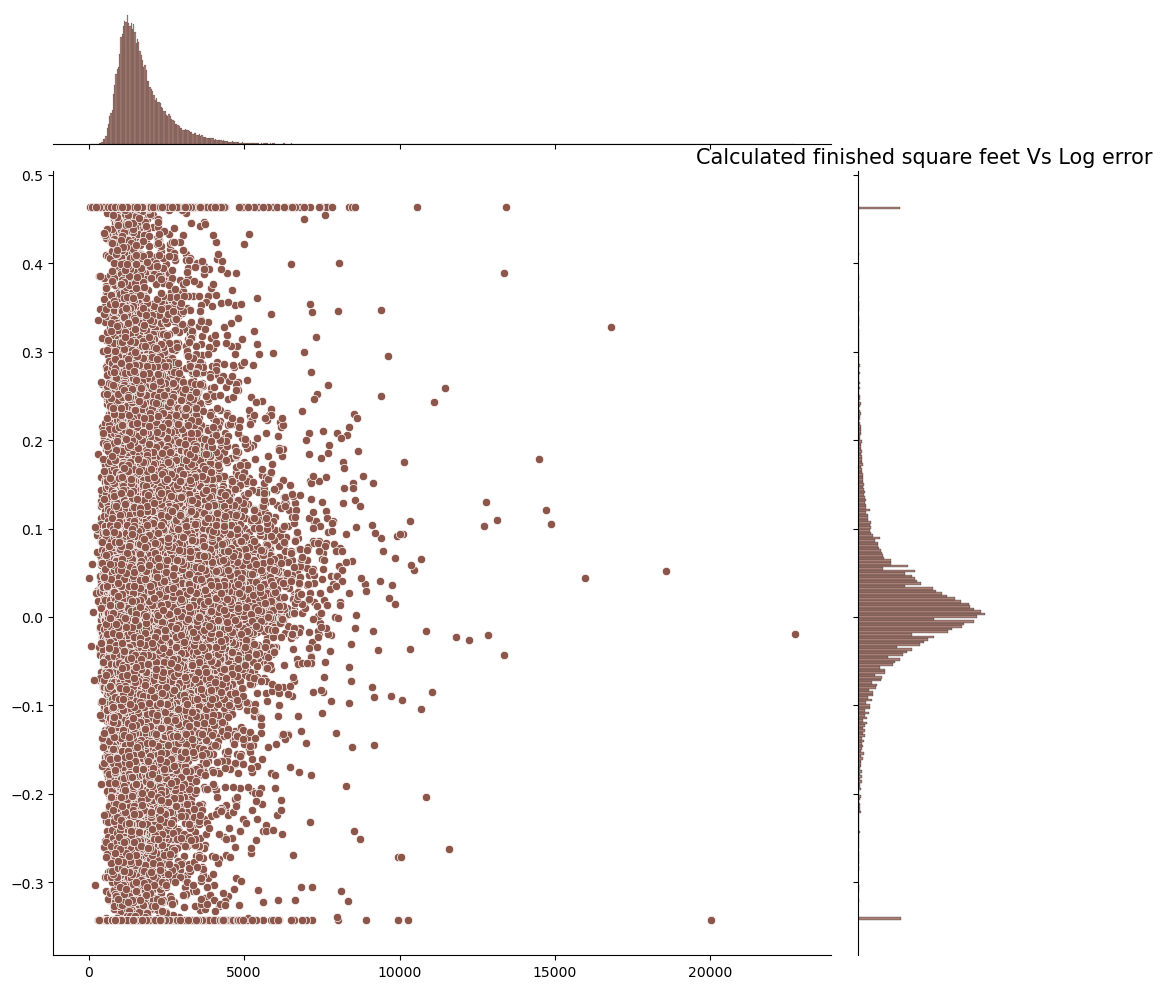

In [97]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)

train_df[col].loc[train_df[col] > ulimit] = ulimit
train_df[col].loc[train_df[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(train_df.calculatedfinishedsquarefeet.values,
             train_df.logerror.values, size = 10, color=color[5])
plt.ylabel("Log Error", fontsize = 12)
plt.xlabel("Calculated finished square feet", fontsize = 12)
plt.title("Calculated finished square feet Vs Log error", fontsize = 15)
plt.show()

Above two distributions are  very similar\
Correlation between the two variables are also high

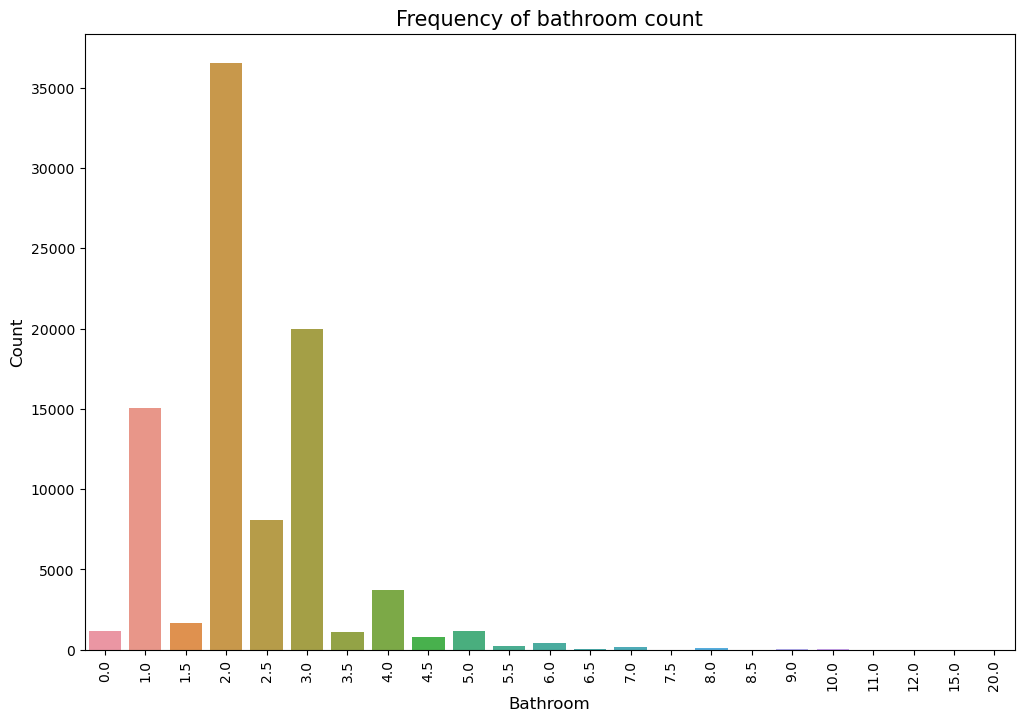

In [98]:
# Bathroom Count

plt.figure(figsize=(12, 8))
sns.countplot(x="bathroomcnt", data=train_df)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Bathroom", fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of bathroom count", fontsize=15)
plt.show()

Now check how the log error changes based on this

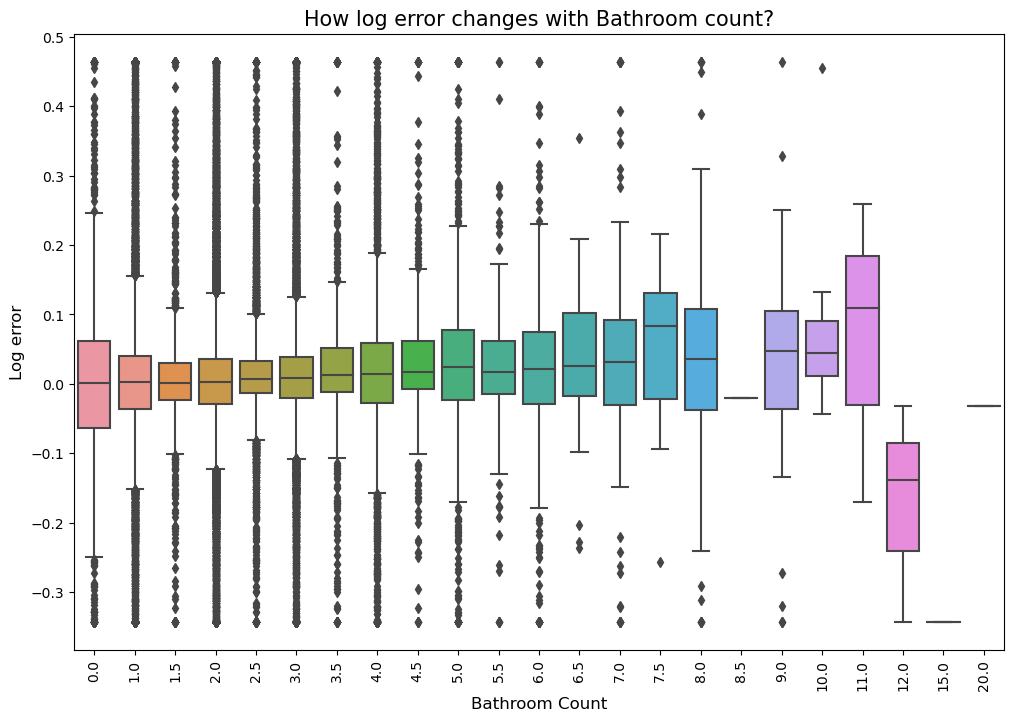

In [99]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=train_df)
plt.ylabel("Log error", fontsize=12)
plt.xlabel("Bathroom Count", fontsize=12)
plt.xticks(rotation="vertical")
plt.title("How log error changes with Bathroom count?", fontsize=15)
plt.show()

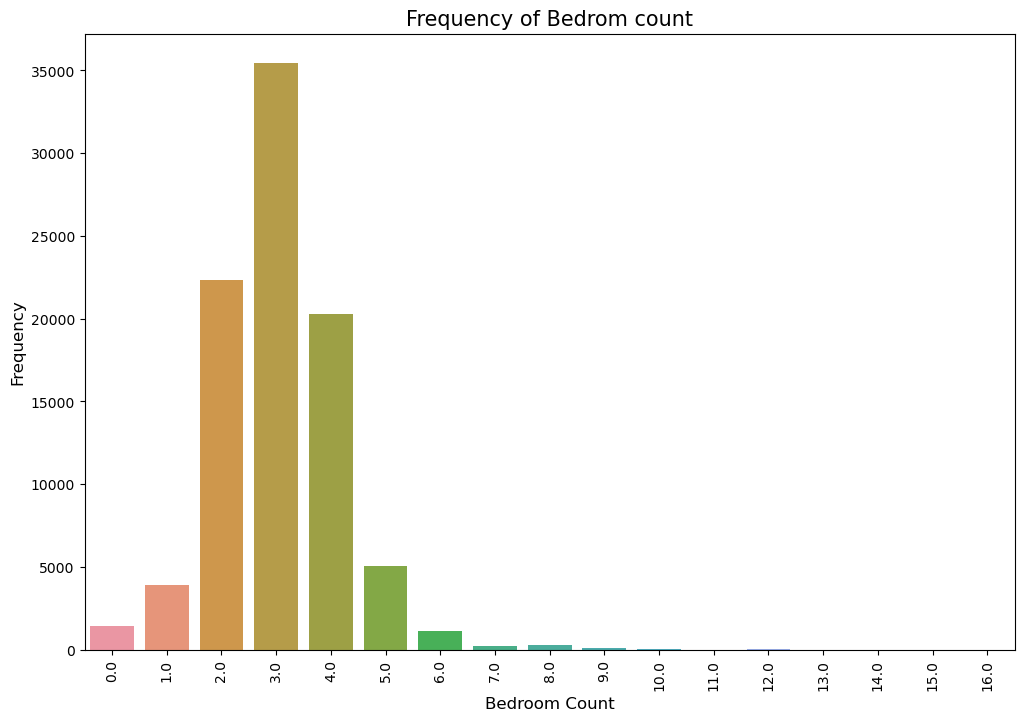

In [100]:
# Bedroom count

plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=train_df)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Bedroom Count", fontsize=12)
plt.xticks(rotation="vertical")
plt.title("Frequency of Bedrom count", fontsize=15)
plt.show()

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\586104515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["bedroomcnt"].loc[train_df["bedroomcnt"] > 7] = 7
C:\Users\cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


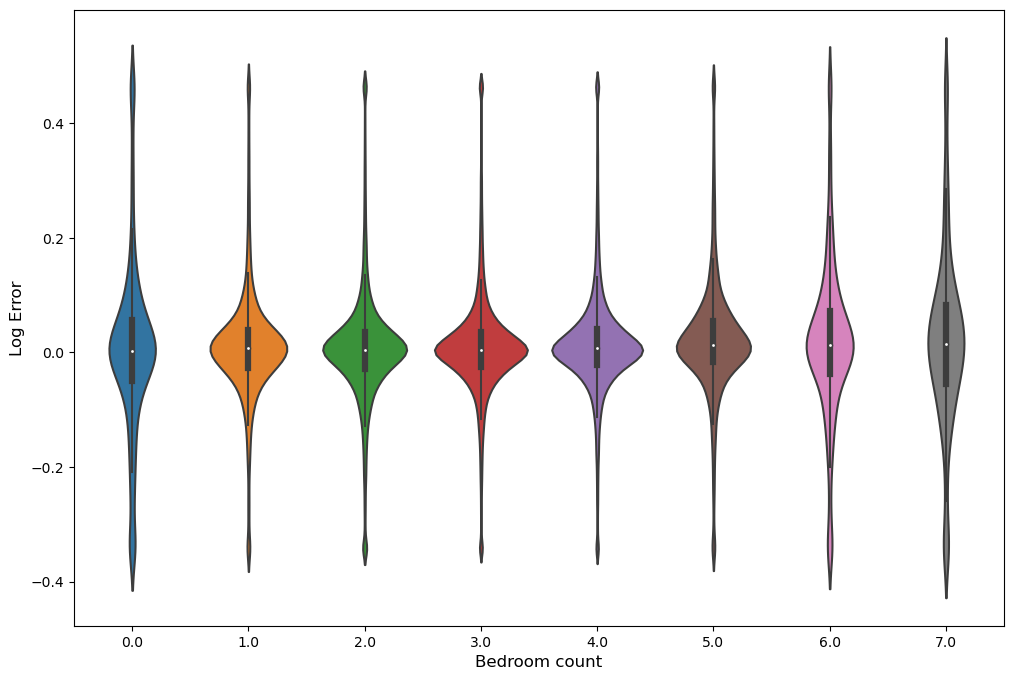

In [101]:
train_df["bedroomcnt"].loc[train_df["bedroomcnt"] > 7] = 7
plt.figure(figsize=(12, 8))
sns.violinplot("bedroomcnt", "logerror", data=train_df)
plt.xlabel("Bedroom count", fontsize=12)
plt.ylabel("Log Error", fontsize=12)
plt.show()

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\931977656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] > ulimit] = ulimit
C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\931977656.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] < llimit] = llimit
C:\Users\cloud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

<Figure size 1200x1200 with 0 Axes>

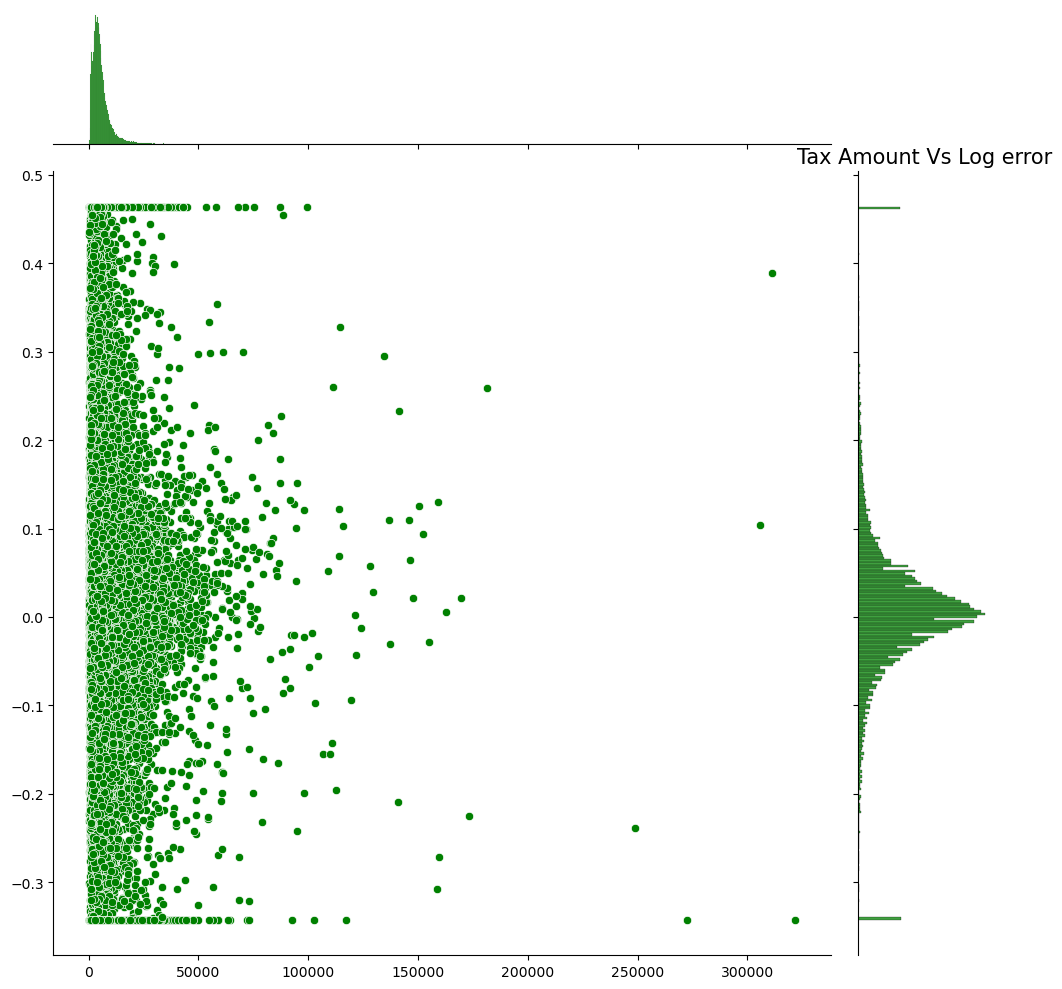

In [102]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col] > ulimit] = ulimit
train_df[col].loc[train_df[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(train_df['taxamount'].values, 
              train_df["logerror"].values, size=10, color="g")
plt.ylabel("Log Error", fontsize=12)
plt.xlabel("Tax Amount", fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

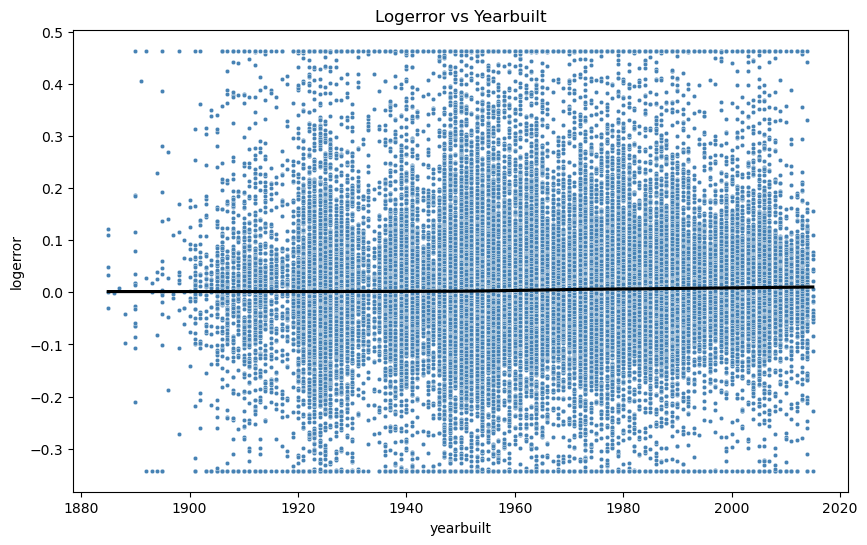

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="yearbuilt", y="logerror", 
                data=train_df, color="steelblue", s=10)
sns.regplot(x="yearbuilt", y="logerror", data=train_df, 
            scatter=False, color="black", lowess=True)
plt.title("Logerror vs Yearbuilt")
plt.show()

# lowess = True --> 부드러운 곡선모양

There is a minor incremental trend seen with respect to built year.\
그러나 검정 실선이 거의 수평에 가까우므로 yearbuilt와 logerror은 거의 무관에 가까움

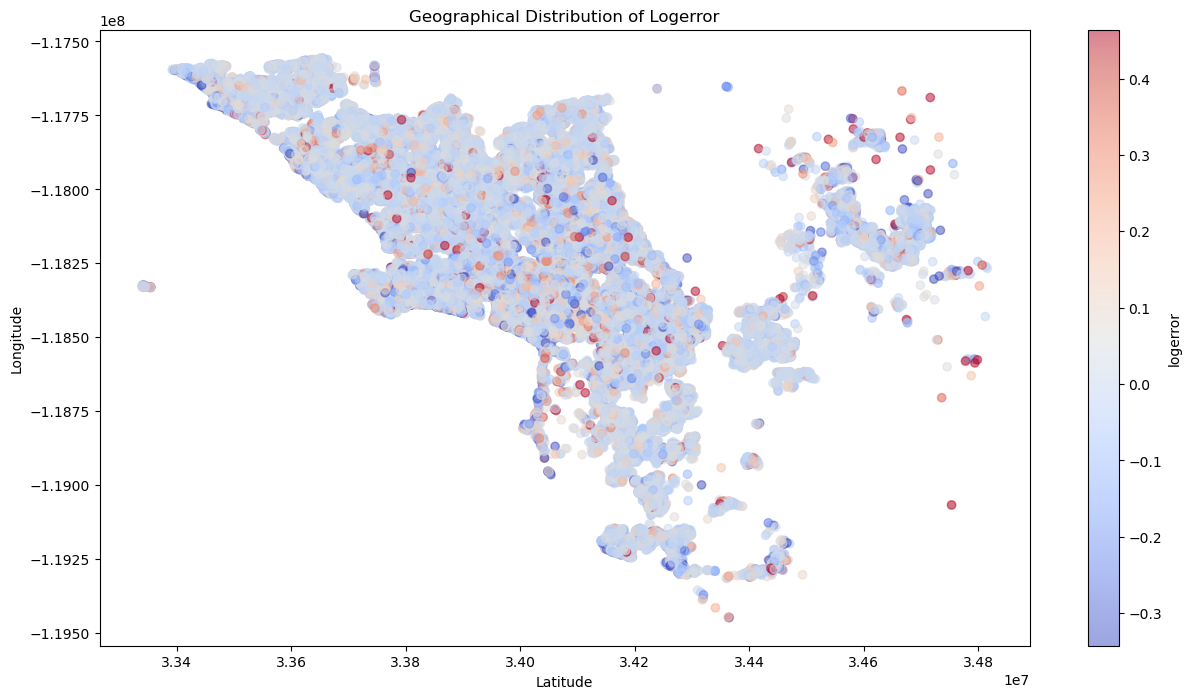

In [104]:
# How logerror varies with respect to latitude and longitude

plt.figure(figsize=(15, 8))
scatter = plt.scatter(train_df["latitude"],
                     train_df["longitude"],
                     c=train_df["logerror"],
                     cmap="coolwarm",
                     alpha=0.5)

plt.colorbar(scatter, label="logerror")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Geographical Distribution of Logerror")
plt.show()

There are no visible pockets as such with respect to latitude or longitude.

Let us take the variables with highest positive & negative correlation\
to see if we can see some visible patterns

In [105]:
col = "taxamount"
ulimit = np.percentile(train_df[col].values, 99.5)
llimit = np.percentile(train_df[col].values, 0.5)
train_df[col].loc[train_df[col] > ulimit] = ulimit
train_df[col].loc[train_df[col] < llimit] = llimit

C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\1934874189.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] > ulimit] = ulimit
C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\1934874189.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col].loc[train_df[col] < llimit] = llimit


C:\Users\cloud\AppData\Local\Temp\ipykernel_16256\2737507370.py:6: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(scatter, label="logerror")


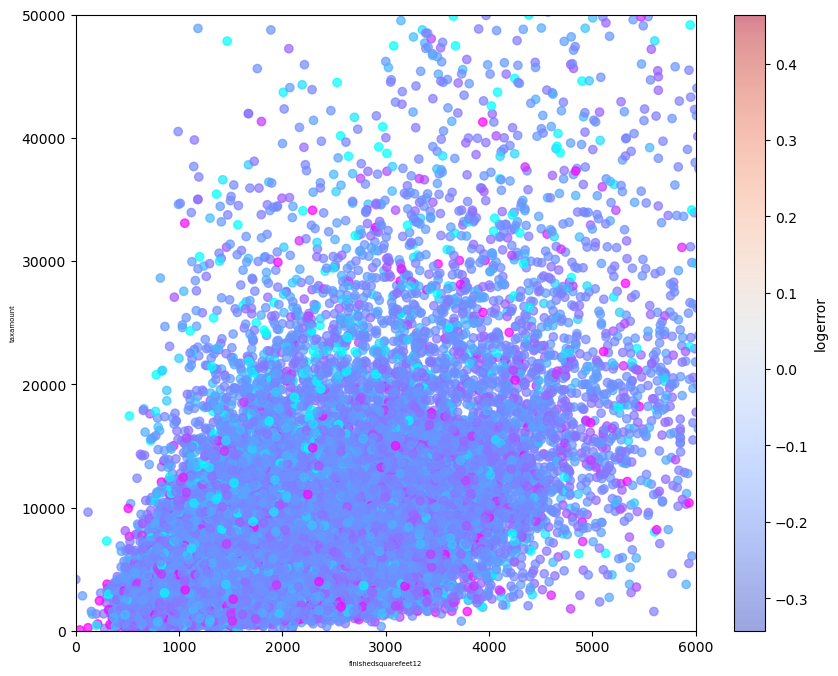

In [106]:
plt.figure(figsize=(10, 8))
plt.scatter(train_df["finishedsquarefeet12"], train_df["taxamount"], 
            c=train_df["logerror"], cmap="cool", alpha=0.7)
plt.xlabel("finishedsquarefeet12", fontsize=5)
plt.ylabel("taxamount", fontsize=5)
plt.colorbar(scatter, label="logerror")

plt.xlim(0, 6000)
plt.ylim(0, 50000)
plt.show()

There are no visible patterns as well

In [107]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", 
            "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate', 
                          'transaction_month']+cat_cols, axis=1)

feat_names = train_df.columns.values

ExtraTreeRegressor(트리 기반 모델)\
데이터를 분할해서 예측하는데 어떤 변수가 예측값(분산)을 줄이는 데 얼마나 기여했는가?

데이터를 나눴을 때 분산이 줄어들면 중요한 변수로 판단

In [112]:
train_df = train_df.fillna(0)

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30,
                                    max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

# n_estimators -> 트리의 개수
# max_depth -> 트리의 최대 깊이
# max_features -> 전체의 %만 랜덤으로 선택해서 분기에 사용
# n_jobs -> 병렬처리 설정. -1일 경우 모든 CPU 코어를 사용해서 가능한 빨리 처리

ExtraTreesRegressor(max_depth=30, max_features=0.3, n_estimators=25, n_jobs=-1,
                    random_state=0)

In [113]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
# 내림차순 정렬 후 상위 20개만 선택

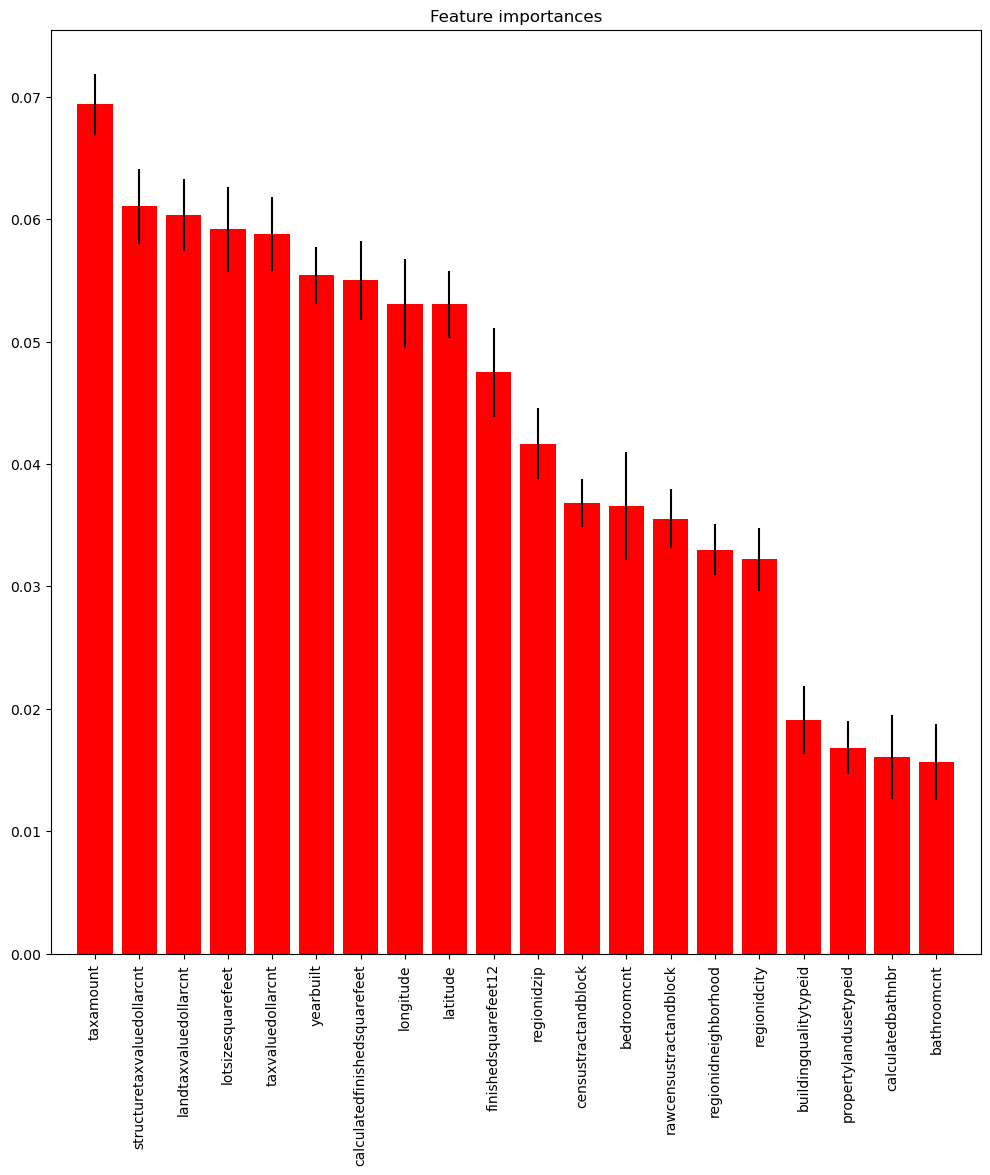

In [114]:
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

Seems tax amount is the most important variable

C:\Users\cloud\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\cloud\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


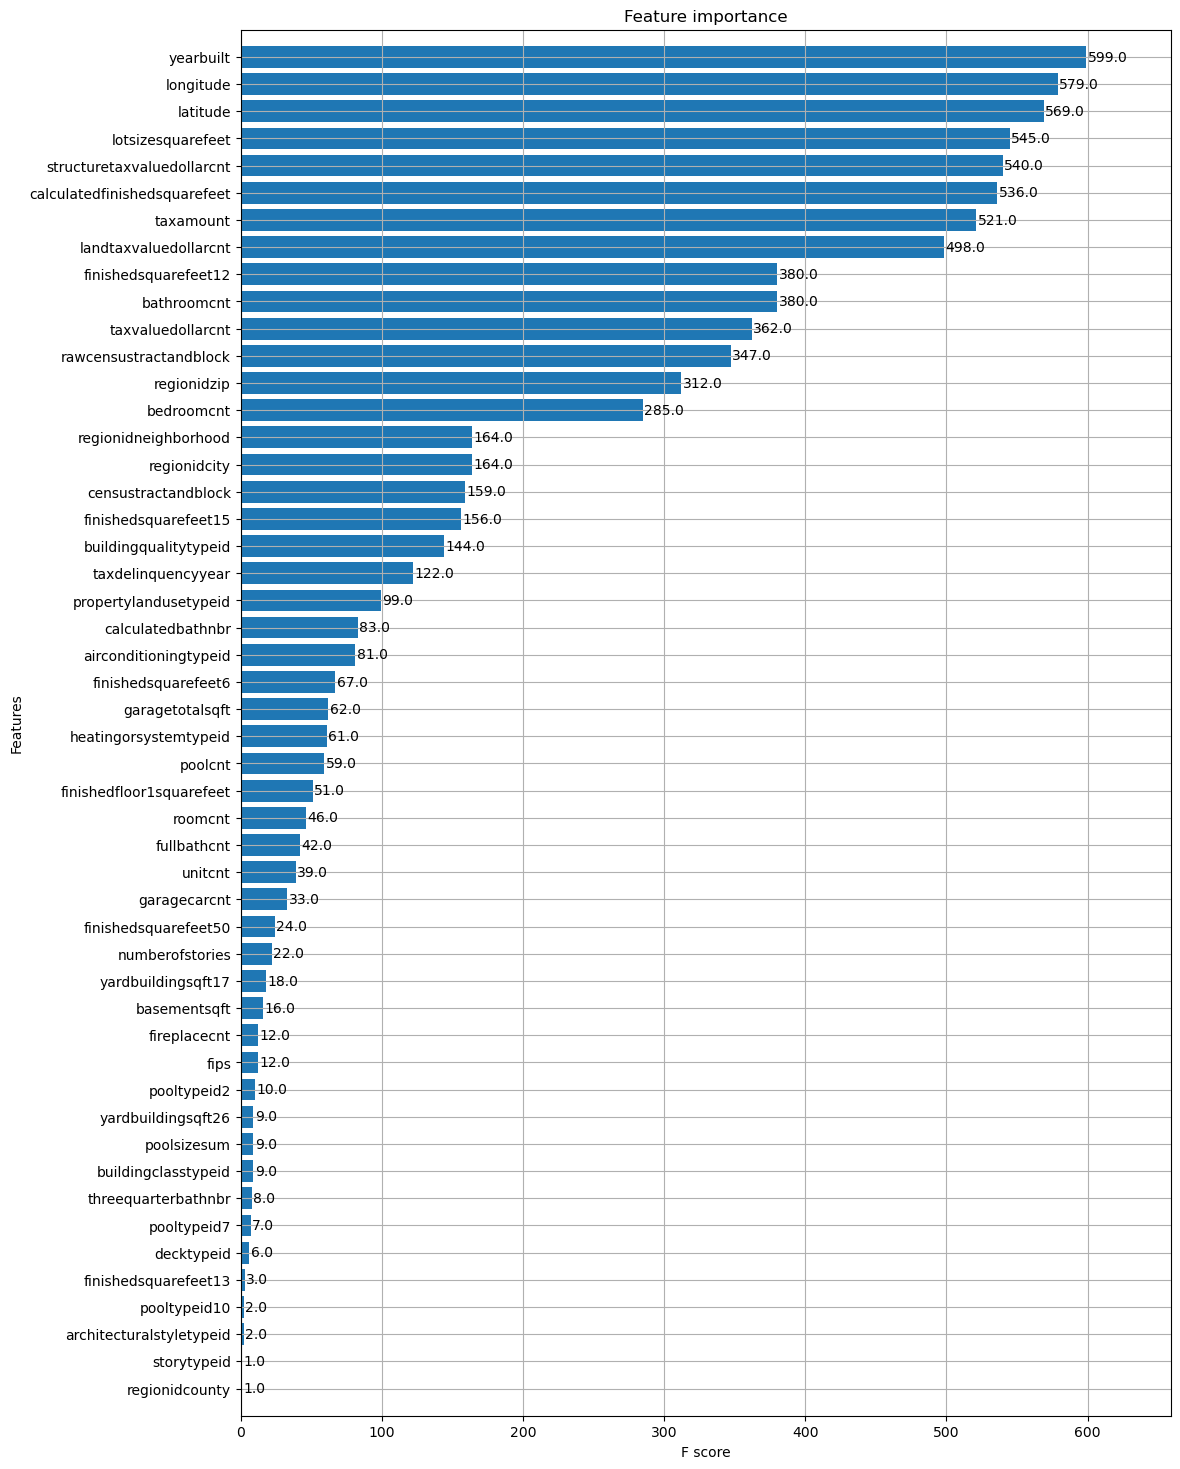

In [125]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, 
                     feature_names=list(train_df.columns))
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

Using XGBoost, the important variables are yearbuilt, longitude, latitude, ...